# 1st DATATHON

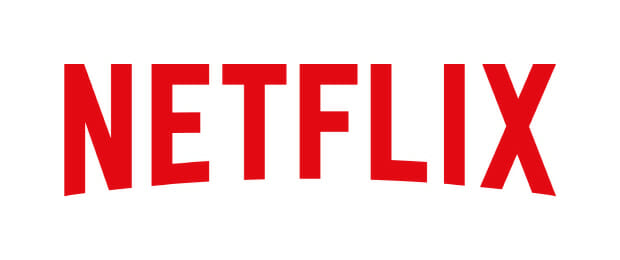

# Why is Netflix popular?  

## 왜 우리는 넷플릭스인가?
***
### “요즘 넷플릭스 뭐 봐?”

안부를 묻듯 이 질문은 요즘 자연스럽게 묻는 질문이 되었습니다. 코로나19 팬데믹 이후 집안에 머무는 시간이 증가하면서 가장 수혜를 받은 기업은 넷플릭스가 아닐까 생각이 듭니다. 넷플릭스는 전 세계 가입자가 2억 명에 육박하고 무서운 성장세를 보이고 있지만, 최근 디즈니 플러스, HBO 맥스, 애플 TV 등 새로운 OTT 서비스의 등장으로 입지가 위험하지 않냐는 우려의 목소리가 들리기도 합니다. 그럼에도 불구하고 ***넷플릭스가 절대 강자의 자리를 내어주지 않는 이유가 무엇일까?*** 궁금증이 생깁니다.  
### 동영상 콘텐츠 유료 이용 서비스 1위

오픈서베이 콘텐츠 트렌드 리포트 2019에 따르면, 넷플릭스는 주 이용 유료 동영상 서비스 분야에서 압도적인 1위를 달리고 있습니다(47.3%).  
그렇다면 사람들은 왜 넷플릭스를  주로 이용한다고 답변 하였을까요? 넷플릭스 주 이용자들은 가장 큰 이유로 ***‘콘텐츠의 수가 많아서(64.1%)’, ‘여기서만 이용할 수 있는 특정 콘텐츠가 있어서(56.4%)’*** 를 꼽았습니다.  
[참고 기사 링크](https://blog.opensurvey.co.kr/article/contents-trend-2019/)  
### 가설을 세워보자
본격적으로 위 설문을 바탕으로 하여 넷플릭스 컨텐츠 수와 다양성에 대해 파헤쳐보기로 했습니다.  
데이터셋은 캐글에서 제공한 [****‘Netflix Movies and TV Shows’****](https://www.kaggle.com/shivamb/netflix-shows)를 활용하였습니다.  

제공된 데이터 셋 안에서 넷플릭스가 인기 있는 이유를 설명하기 위해 세 가지 가설을 세우고, 그 가설에 대한 내용을 시각화하여 확인해 보겠습니다. 

1. 첫 번째 가설  
    넷플릭스가 인기있는 이유는 제작한 나라별 컨텐츠 종류가 다양하기 때문이다.  
2. 두 번째 가설  
    넷플릭스가 인기있는 이유는 다양한 연령대의 컨텐츠가 존재하기 때문이다.  
3. 세 번째 가설    
    넷플릭스가 인기있는 이유는 꾸준히 영상을 업데이트하기 때문이다.

# 목차
***
## 1. 데이터 살펴보기
- 필요한 패키지 확인
- 데이터셋 구성 확인
- 결측치 확인

## 2. 데이터 전처리
- 결측치 정리
- 필요한 컬럼 추가하기

## 3. 데이터 시각화
- TV Show 와 Movie 비율
- 나라별 제작한 컨텐츠 수
- 등급별 컨텐츠 수
- 장르별 컨텐츠 수
- 연도별 추가된 컨텐츠 수
- TV show Season & Movie 상영시간에 따른 컨텐츠 수

## 4. 결론
- 데이터셋으로 알 수 있었던 점
- 그 외 기사를 통해 알아본 것

## 5. 참고 사이트

 ***
# 1. 데이터 살펴보기

## 1-1. 필요한 패키지를 불러오자

In [1]:
# !pip install plotly

In [2]:
# 필요 패키지 load
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns       # 매력적이고 유익한 통계 그래픽을 그리기 위한 고급 인터페이스 제공
import missingno as msno    # 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지
import plotly
import plotly.express as px # 패싯, 맵, 애니메이션 및 추세선을 포함하여 풍부한 대화형 플롯 표현 library
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)  

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 주요 library version 
print(f'numpy : {np.__version__}')
print(f'pandas : {pd.__version__}')
print(f'seaborn : {sns.__version__}')
print(f'matplotlib : {mpl.__version__}')
print(f'plotly : {plotly.__version__}')

numpy : 1.21.4
pandas : 1.3.3
seaborn : 0.11.2
matplotlib : 3.4.3
plotly : 5.6.0


## 1-2. 데이터셋을 확인해보자

###  데이터 셋 구성
   - 8807개의 행
   - 12개의 열
    
| Column Name | Description |
| ----------- | ------------|
| show_id | 각 영상의 고유 ID |
| type | 카테고리(영화 또는 TV 쇼) |
| title | 영상의 이름 |
| director | 각 영상의 감독명 |
| cast | 배우명 및 다른 출연진 |
| country | contents를 제작한 국가명 |
| release_year | 영상의 출시 연도 |
| rating | 영상의 등급 표시 |
| duration | 영상의 지속 시간 |
| listed_in | 영상의 장르 |
| description | 각 영상의 설명 |

In [4]:
# load data
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.shape

(8807, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# 각 column 구성 확인
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# 요약통계 확인
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
# object type 요약통계 확인
data.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


- unique, top, freq 와 함께 확인 가능하여 한눈에 확인시 좋을 것으로 판단됩니다.
    - count : 총 데이터 수
    - unique : 중복없이 나오는 고유한 데이터 값
    - top : 가장 값이 많은 데이터(최빈값인 항목)
    - freq : 최빈 데이터의 실제 수 (Top의 개수, 최빈값)

## 1-3. 결측치 확인해보자

### 결측치 시각화

<AxesSubplot:>

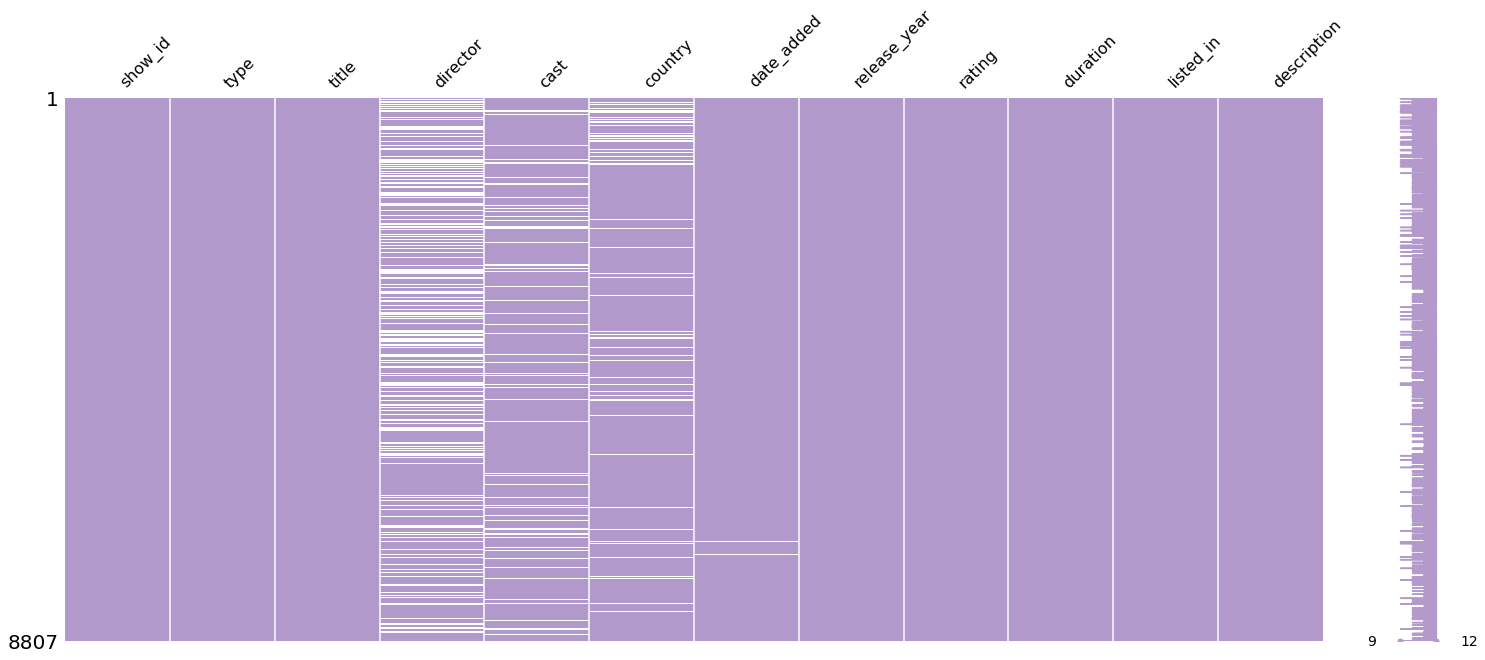

In [10]:
# 결측값 확인(matrix)
msno.matrix(data, color=(0.7, 0.6, 0.8))   # color = (R, G, B)

- missingno 패키지를 사용하면 데이터세트에서 누락 패턴을 매우 빠르게 찾을 수 있습니다.  
- 위의 시각화에서 "director"가 눈에 띄는 독특한 패턴을 가지고 있음을 관찰할 수 있습니다.  
- "cast"와 "country"는 유사한 결측값 패턴을 가지고 있는 반면 "date_added" 열은 다른 패턴을 보여줍니다.  

<AxesSubplot:>

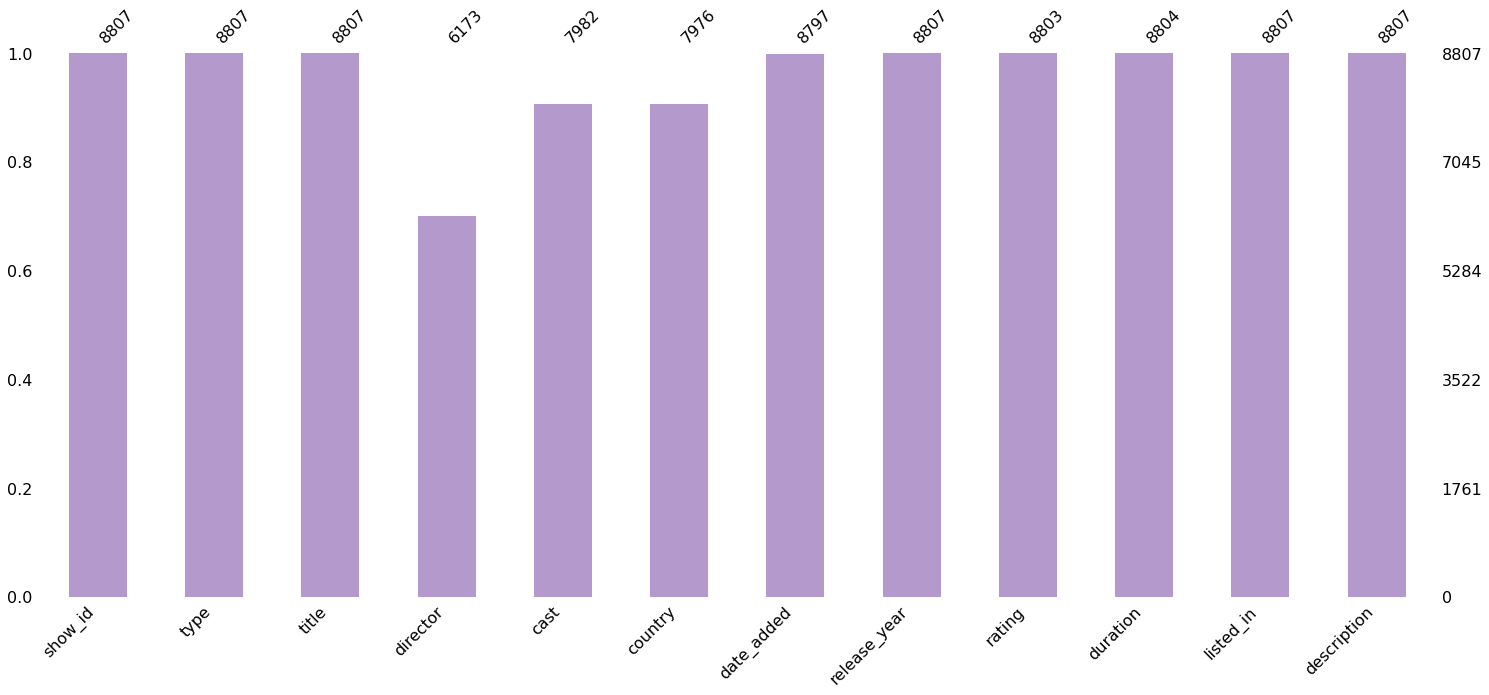

In [11]:
# 결측값 확인(bar chart)
msno.bar(data, color=(0.7, 0.6, 0.8))

- 위 막대 차트는 각 열에 얼마나 많은 결측값이 있는지 확인할 수 있습니다.  
- "director"는 "cast" 및 "country" 다음으로 가장 많이 누락된 값을 가집니다.  
- "date_added" 및 "rating"에 누락된 값이 거의 없는 것이 확인됩니다.

### 결측치 백분율로 확인

In [12]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
#         print("{}'s null rate : {}%".format(i, round(null_rate, 2)))
        print("{:>10}'s null rate :{:>8}%".format(i, round(null_rate, 2)))

  director's null rate :   29.91%
      cast's null rate :    9.37%
   country's null rate :    9.44%
date_added's null rate :    0.11%
    rating's null rate :    0.05%
  duration's null rate :    0.03%


# 2. 데이터 전처리

## 2-1. 결측치 데이터 정리

In [13]:
# 각 column 별 unique 수
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [14]:
# 결측치 수량 검출
data.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

- 결측값에 따른 정리 계획

    - "director": 결측치(약 30%)가 많고 확인하기 어렵기에 삭제하겠습니다.  
    - "cast": 이것도 "director"와 같이 제외하겠습니다.  
    - "country": 결측치(약 10%)가 많지만 중요한 변수이므로 "country" 최빈값으로 대치합니다.
    - "date_added": 추가된 날짜 확인도 어렵고 결측치도 미미하여 삭제하겠습니다.
    - "rating": 이것도 "date_added"와 같이 검색하여 반영합니다. 

### "rating" 결측치 정리

In [15]:
# "rating" unique 확인
data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
# "rating" 결측치 확인
data[data["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


- 결측값이 4개 뿐이기에 구글링하여 아래와 같이 대치합니다.

In [17]:
rating_replacements = {
    5989: 'TV-14',
    6827: 'TV-14',
    7312: 'TV-PG',
    7537: 'PG-13 '
}

for id, rate in rating_replacements.items():
    data.iloc[id, 8] = rate
    
data['rating'].isna().sum()

0

In [18]:
data[5989:5990]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-14,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...


- 위 처럼 "rating" 의 결측값은 수정되었음을 확인할 수 있습니다.

### "director" and "cast" columns 삭제

- 결측값에 따른 정리 계획에 따라 두 column은 삭제합니다.

In [19]:
# drop 메소드 활용하여 "director", "cast" 삭제
data = data.drop(['director', 'cast'], axis=1)
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
data.head(1)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


### "date_added" column 결측치 정리

In [21]:
# "date_added" 결측치 확인
data[data['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


- "date_added"를 파악하기가 어렵고 10개에 불과하므로 삭제하겠습니다.

In [22]:
# df.notna()를 사용하여 NA가 아닌 값들을 새로운 변수에 지정
data = data[data["date_added"].notna()]

In [23]:
data[6065:6067]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6065,s6066,Movie,A Wrinkle in Time,United States,"September 25, 2018",2018,PG,110 min,Children & Family Movies,"Years after their father disappears, Meg and h..."
6067,s6068,TV Show,A.D. Kingdom and Empire,United States,"December 15, 2017",2015,TV-14,1 Season,TV Dramas,"In the wake of Jesus Christ's crucifixion, his..."


### "country" 결측치 정리

In [24]:
# "country" 결측치 확인
data[data['country'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


- 830개(약 10%)의 결측치가 확인됩니다.
- contents를 제작한 나라를 파악하기 어렵기에 제작한 나라 중 최빈값(나라)로 반영합니다.

In [25]:
# df.mode() 활용하여 최빈값(나라)로 채웁니다.
data['country'] = data['country'].fillna(data['country'].mode()[0])

- 위 코드의 이해를 위해 하나씩 풀어보았습니다.

In [26]:
data['country'].mode()

0    United States
dtype: object

In [27]:
data['country'].mode()[0]

'United States'

- 위와 같이 mode()로 반환된 최빈값이 `object` type 이므로 
- "United States"만 반영하기 위해 `.mode()[0]` 를 사용하는 것을 확인

In [28]:
data[data['country'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


- 아래와 같이 "country"에 여러 나라가 표현된 항목이 있습니다.
- 두 개 이상의 국가가 입력된 항목이 있으나 각 나라에 포함해서 counting하면 되기에 그대로 사용하기로 판단합니다.

In [29]:
data['country'].head(10)

0                                        United States
1                                         South Africa
2                                        United States
3                                        United States
4                                                India
5                                        United States
6                                        United States
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

### "duration" 결측치 정리

In [30]:
# "duration" 고유값 확인
data["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

- 영화 : 상영시간으로 표현
- TV Show : Season으로 표현된 것으로 판단합니다.

In [31]:
# "duration" 결측치 확인
data[data['duration'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- "duration"의 상영 시간이 "rating"에 잘 못 들어가 있는 것으로 보입니다.
- "rating" 값을 반영해도 되지만 넷플릭스에서 검색 및 확인 후 "duration" 반영합니다.
- "rating"도 넷플릭스에서 확인 후 수정합니다.

In [32]:
duration_replacements = {
    5541: '74 min',
    5794: '84 min',
    5813: '66 min',
}

for id, dura in duration_replacements.items():
    data.iloc[id, 7] = dura
    
data['duration'].isna().sum()

0

In [33]:
rating_replacements = {
    5541: 'NC-17',
    5794: 'NC-17',
    5813: 'NC-17',
}

for id, rate in rating_replacements.items():
    data.iloc[id, 6] = rate
    
data[data['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


- 계획한 대로 잘 반영된 것을 확인할 수 있습니다.

## 2-2. 필요한 컬럼 추가하기

### Year and month

- "date_added"에서 년, 월 분리합니다.

In [34]:
data['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [35]:
# "date_added"에서 년도만 분리하여 새로운 변수에 할당합니다.
data['year_added'] = data['date_added'].apply(lambda x: x.split(" ")[-1])
data['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [36]:
# "date_added"에서 월만 분리하여 새로운 변수에 할당합니다.
data['month_added'] = data['date_added'].apply(lambda x: x.split(" ")[0])
data['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [37]:
# "year_added", "month_added" 반영확인
data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


#### Targets based on "rating"

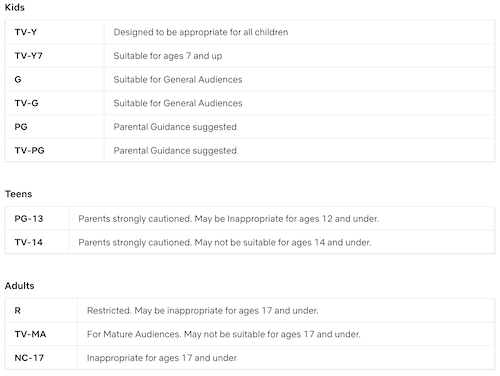

- 연령대별 다양한 "rating" grouping 하여 "target_ages" 변수 추가

In [38]:
# "rating" => Kids, Older Kids, Teens, Adults
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'PG-13 ': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

data['target_ages'] = data['rating'].replace(ratings_ages)
data['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [39]:
# "target_ages" 반영확인
data.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Adults
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Adults
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Adults
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Adults


## 2-3. 메모리 사용 절감을 위한 datatype 변경

- 참고한 캐글에서 아래와 같은 datatype 변경을 사용하였습니다.
- 왜 그런지 궁금하여 구글링을 해보니 아래와 같은 효과가 있다고 합니다.
> 카테고리형 데이터를 이용하면 반복된 데이터를 코드화하여  
  **데이터의 사이즈를 줄여서 메모리 사용량이 줄어 들고 데이터 처리 속도가 빨라집니다.**  
  [WikiDocs](https://wikidocs.net/78187)

In [40]:
# "type", "target_ages"를 category dtype으로 변경
data['type'] = pd.Categorical(data['type'])
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# "released_year" 비교를 위해 정수형으로 변경
data['year_added'] = pd.to_numeric(data['year_added'])

In [41]:
data.dtypes

show_id           object
type            category
title             object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
year_added         int64
month_added       object
target_ages     category
dtype: object

# 3. 데이터 시각화

## 3-1. TV Show & Movie 컨텐츠 비율

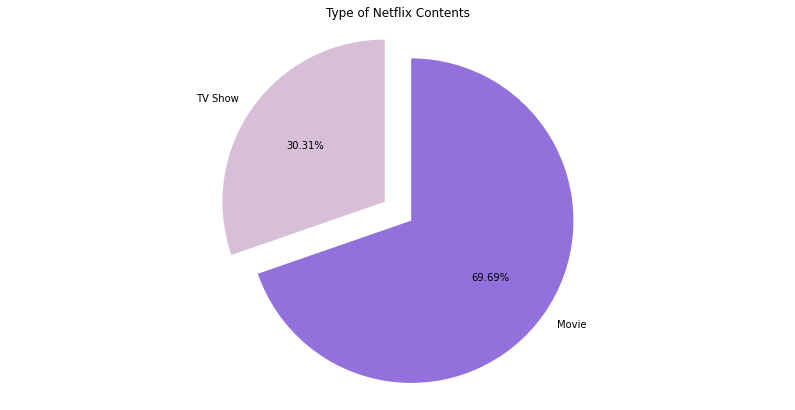

In [42]:
# Netflix 컨텐츠 Pieplot으로 확인하기
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(data['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['thistle','mediumpurple'], startangle=90)
plt.title('Type of Netflix Contents')
plt.axis('equal')
plt.show()

- 넷플릭스 콘텐츠의 약 70%가 영화, 나머지는 TV 쇼입니다.

## 3-2. 컨텐츠 제작한 나라 현황

In [43]:
# 여러 국가 중 첫번째 국가만 검색합니다.
data['principal_country'] = data['country'].apply(lambda x: x.split(",")[0])
data['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

### 넷플릭스에 공개된 년도별 컨텐츠 제작 Country 확인

In [44]:
year_country = data.groupby('year_added')['principal_country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country, locations="principal_country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,100],
                    color_continuous_scale=px.colors.sequential.RdPu   #PuBu 
                   )

fig.update_layout(title='Comparison by country')
fig.show()

### 가장 많은 컨텐츠를 제작한 나라 Top-22

In [45]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict
                             (Counter
                              (','.join(country_data).replace(' ,',',').replace(', ',',').split(',')
                              ))).sort_values(ascending=False)

In [46]:
tot = sum(country_counting)
top22 = sum(country_counting[:22]) 

print(f'total : {tot}')
print(f'top 22 countries : {top22}')
print(f'percentage : {top22}/{tot} = {100 * top22/tot}')

total : 10840
top 22 countries : 9694
percentage : 9694/10840 = 89.4280442804428


In [47]:
top22_country = country_counting[:22]

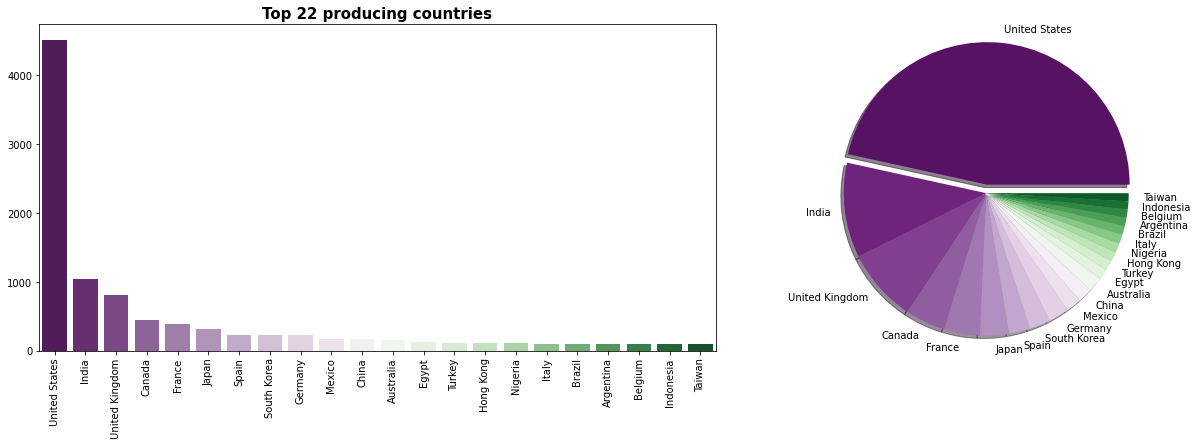

In [48]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top22_country.index, top22_country, ax=ax, palette="PRGn")
ax.set_xticklabels(top22_country.index, rotation='90')
ax.set_title('Top 22 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(22)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top22_country, labels=top22_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("PRGn", n_colors=22)
       )
ax2.axis('equal') 

plt.show()

In [49]:
# !pip install pywaffle

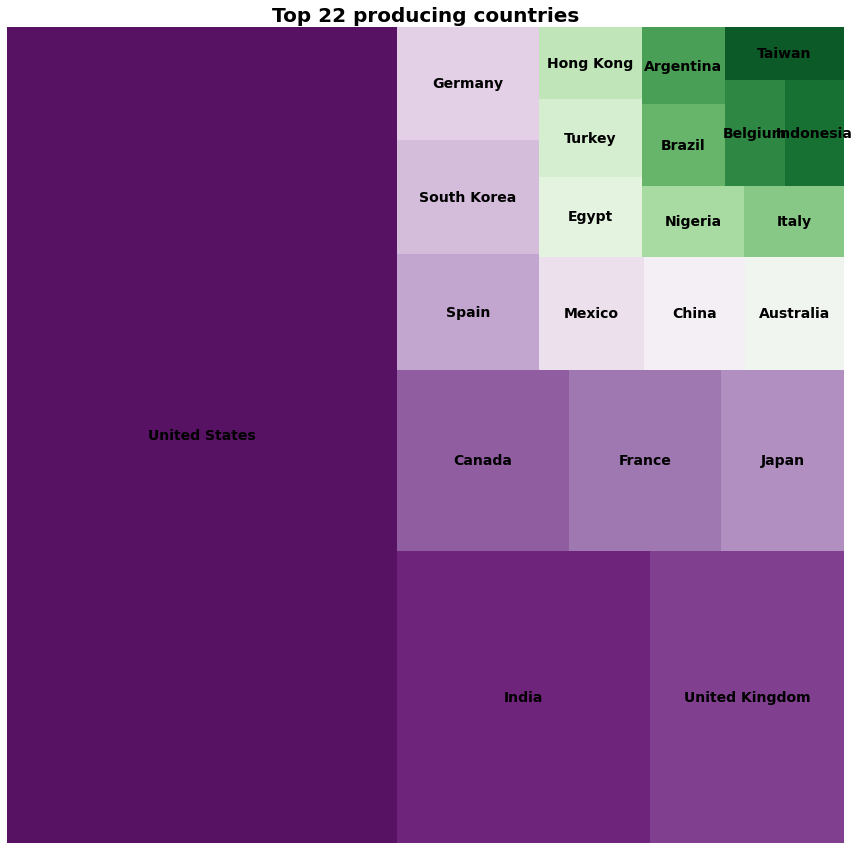

In [50]:
import squarify

y = top22_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("PRGn", n_colors=22), #RdGy
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 22 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

In [51]:
# !pip install pywaffle

In [52]:
from pywaffle import Waffle

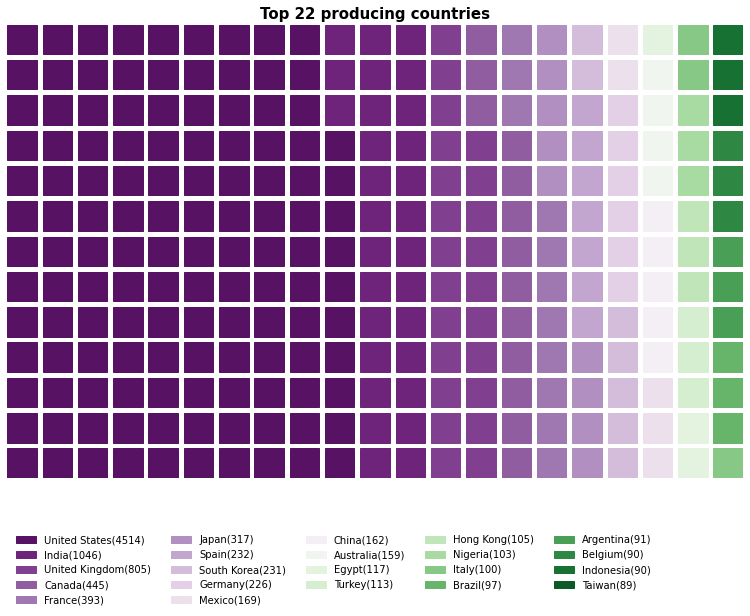

In [53]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    colors=sns.color_palette("PRGn", n_colors=22),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(y)//4,  'framealpha': 0},
    font_size=15, 
    figsize=(11, 11),  
    icon_legend=True
)

plt.title('Top 22 producing countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold')
plt.show()

## 3-3. 등급별 contents 현황

In [54]:
# tv 와 movie 데이터 분리
df_tv = data[data["type"] == "TV Show"]
df_movies = data[data["type"] == "Movie"]

In [55]:
df_tv.shape

(2666, 14)

In [56]:
df_movies.shape

(6131, 14)

### 영화 등급별 컨텐츠 현황

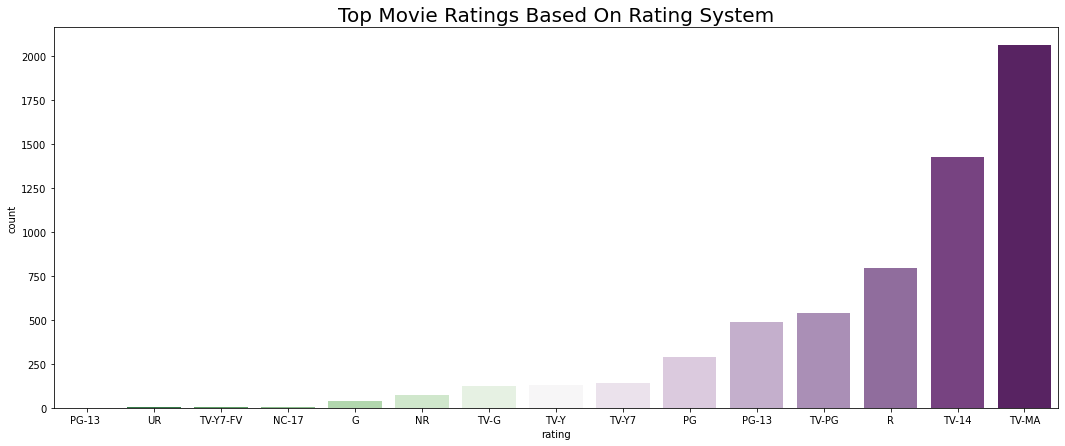

In [57]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count')
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.barplot(x='rating', y='count', data=movie_ratings, palette="PRGn_r")
plt.title('Top Movie Ratings Based On Rating System', size='20')
plt.show()

### 영화 연령대 카테고리별 컨텐츠 현황

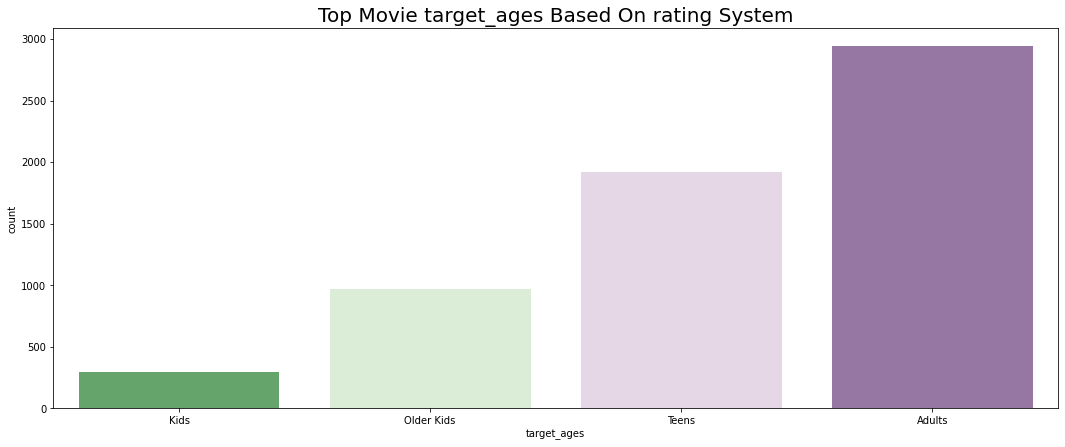

In [58]:
movie_ratings2 = df_movies.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count')
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.barplot(x='target_ages', y='count', data=movie_ratings2, palette="PRGn_r")
plt.title('Top Movie target_ages Based On rating System', size='20')
plt.show()

### TV Show 등급별 컨텐츠 현황

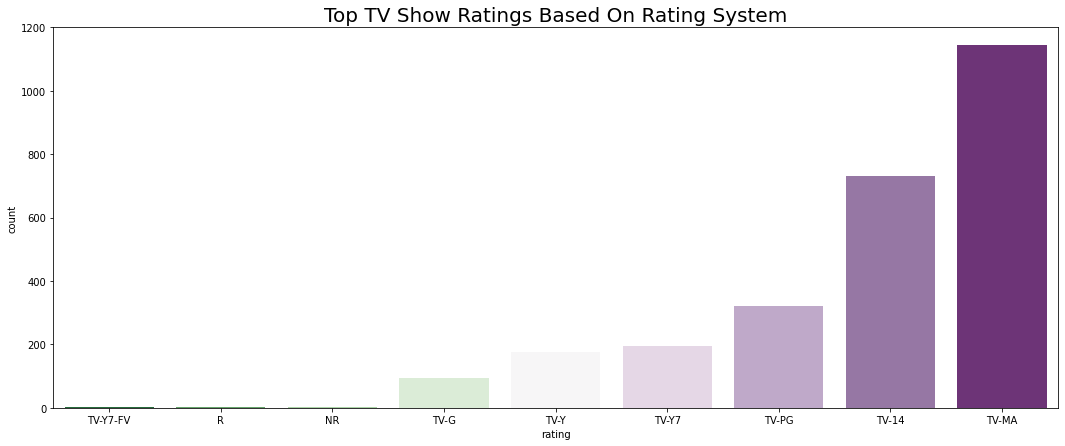

In [59]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count')
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.barplot(x='rating', y='count', data=tv_ratings, palette="PRGn_r")
plt.title('Top TV Show Ratings Based On Rating System', size='20')
plt.show()

### TV Show 연령 카테고리별 컨텐츠 현황

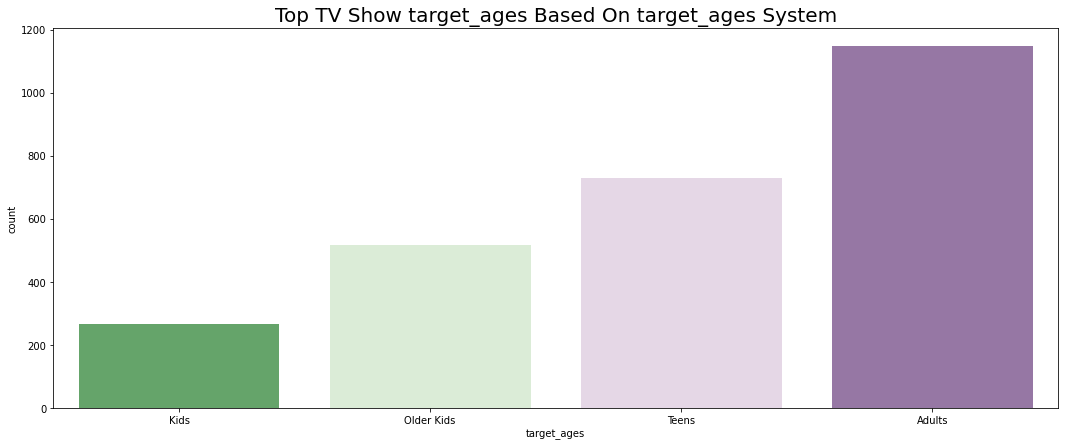

In [60]:
tv_ratings2 = df_tv.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count')
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.barplot(x='target_ages', y='count', data=tv_ratings2, palette="PRGn_r")
plt.title('Top TV Show target_ages Based On target_ages System', size='20')
plt.show()

### TV Show & Movie 등급별 현황 비교

In [61]:
# !pip install altair

In [62]:
import altair as alt
alt.renderers.enable('kaggle')

RendererRegistry.enable('kaggle')

In [63]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

movie_rating = df_movies['rating'].value_counts()[rating_order]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

In [64]:
rating_data = data[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index//12

In [65]:
data['tmp'] = 1
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)


color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

- 영화와 TV Show 모두 성인 등급이 월등히 많은 것을 확인할 수 있습니다.
- 넷플릭스의 contents 등급으로 본 주요 target층이 청소년과 성인을 대상으로 한다는 것을 추정할 수 있습니다.

### 영화와 TV Show 전체로 본 현황은 어떤지 확인해 보아요.

In [66]:
def generate_rating_df(data):
    rating_df = data.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [67]:
rating_df = generate_rating_df(data)
rating_df
# fig = px.bar(rating_df, x='rating', y='counts', color='target_ages',
#              title='Ratings of Movies And TV Shows Based On Target Age Groups',  
#              labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
# fig.show()

,rating,target_ages,counts
0,G,Kids,41
32,TV-G,Kids,220
44,TV-Y,Kids,306
13,PG,Older Kids,287
41,TV-PG,Older Kids,862
49,TV-Y7,Older Kids,333
53,TV-Y7-FV,Older Kids,6
18,PG-13,Teens,490
22,PG-13,Teens,1
30,TV-14,Teens,2159


In [68]:
# rating_df = generate_rating_df(data)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages',
             title='Ratings of Movies And TV Shows Based On Target Age Groups',  
             labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS'})
fig.show()

- 영화와 TV Show 전체 contents 현황에서도 앞서 본 현황과 같은 것을 확인할 수 있습니다.

## 3-4. TV Show & Movie 장르 Top 10

### TV Show 장르

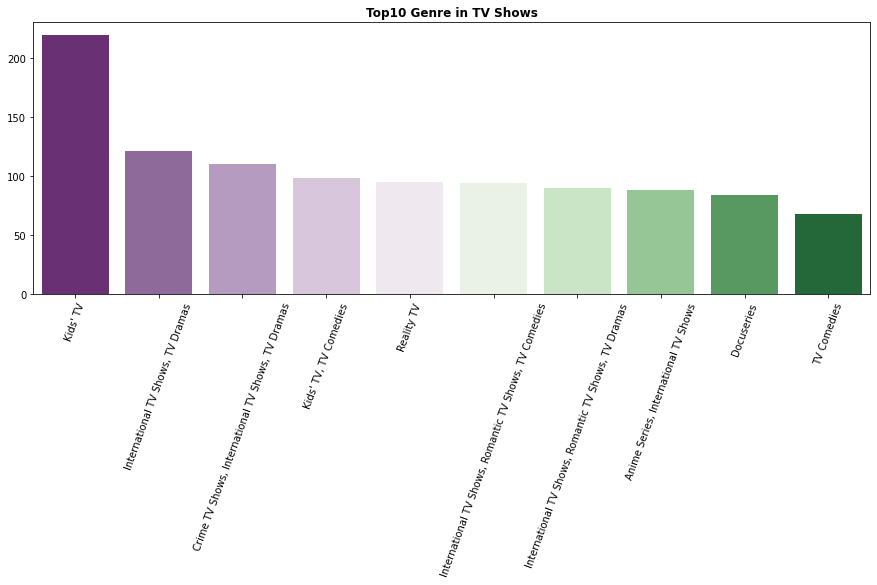

In [69]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="PRGn")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

- TV Show의 주요 장르는 어린이를 위한 TV, 드라마, 코미디로 확인됩니다.

### Movie 장르

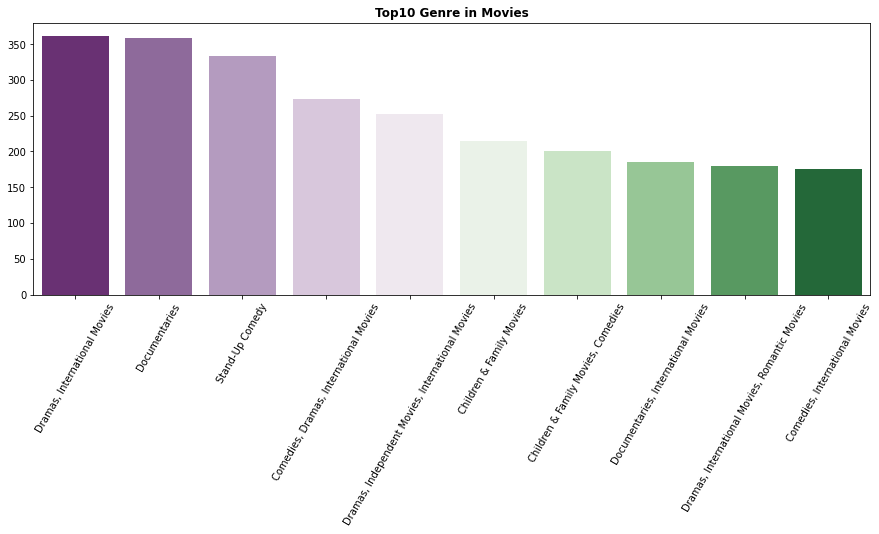

In [70]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="PRGn")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()


- 영화의 주요 장르는 드라마, 다큐멘터리, 코미디로 확인됩니다.

### Word Cloud-TV Show Genre

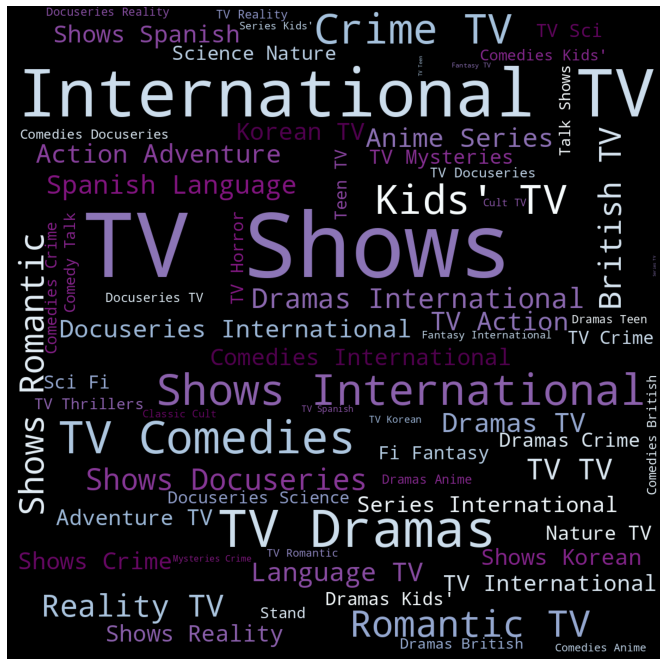

In [71]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black', colormap='BuPu', width = 1200,
                      height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word Cloud-Movie Genre

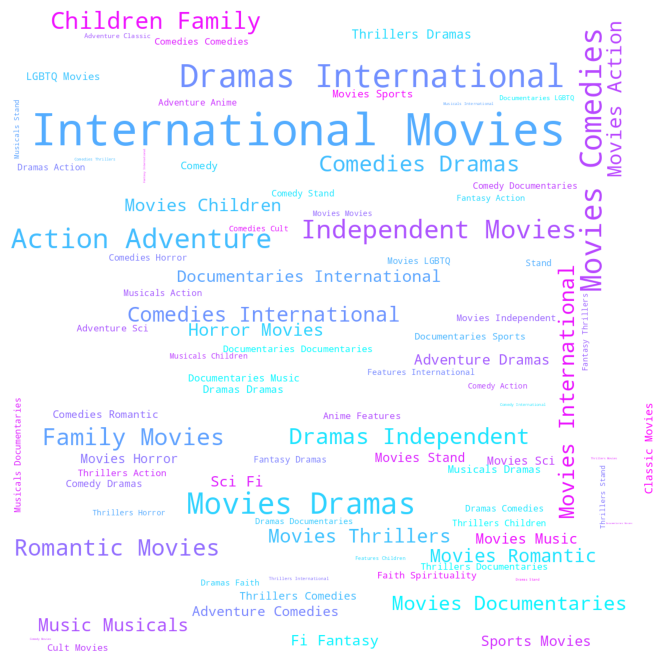

In [72]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', colormap='cool_r', width = 1200, 
                      height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3-5. 연도별 contents 추가 현황

In [73]:
df_content = data['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="royalblue"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="green"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="orchid"))

data_added = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data_added, layout=layout)
fig.show()

- 2015년부터 급성장하는 것을 볼 수 있습니다.
- 넷플릭스의 영화 수 증가율은 TV 프로그램의 증가율보다 훨씬 높습니다.
- 2019년 covid-19 이후 성장세가 꺽이는 모습을 확인할 수 있습니다.
- 하지만 TV-Show는 영화에 비해 상대적으로 정체되는 정도로 보여집니다.
- 이것은 코로나로 인한 현상으로 자택 거주시간 증가로 인한 TV-Show에 대한 수요 증가에 따른 것으로 보입니다.
- 영화의 경우 경쟁사의 OTT 서비스 런칭에 따른 contents의 감소(계약기간 만료 등)에 따른 영향도 있는 것으로 추정됩니다.

## 3-6. Season & 상영시간에 따른 컨텐츠 수

### TV Show Season별 현황

In [74]:
fig = px.histogram(x=df_tv['duration'], color_discrete_sequence=['mediumpurple'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV Shows duration",
    xaxis_title="Duration of TV Shows",
)
fig.show()

- 대부분의 TV 쇼가 시즌 3으로 끝난다고 볼 수 있습니다.

### Movie 상영시간별 현황

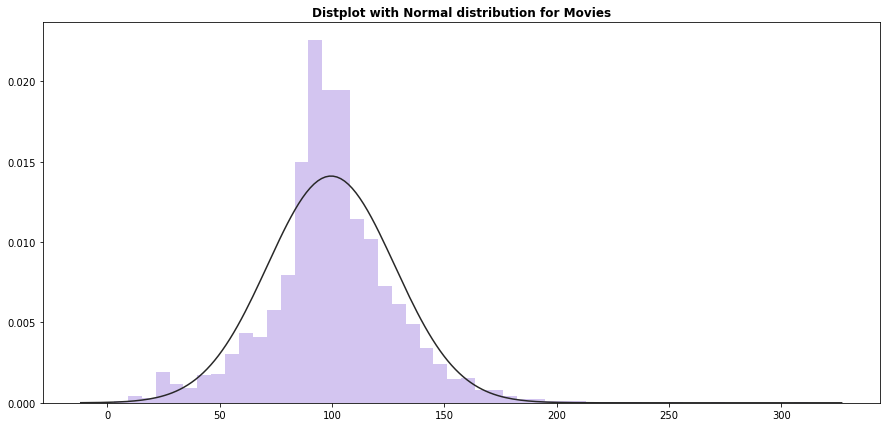

In [75]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['mediumpurple'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

- 대부분의 영화가 85분에서 120분 사이의 상영 시간을 보이고 있습니다.

# 4. 결론

### 넷플릭스가 인기 있는 이유

- 데이터 분석을 통해서 확인할 수 있었던 사항
    1. 다양한 나라에서 제작된 contents가 있다.
    2. 어린이부터 성인까지 즐길 수 있는 contents가 있다.
    3. 드라마, 코미디 위주의 대중성있는 장르에 집중되어 있다.
    4. 코로나가 아니었다면 2015년 부터 이어온 contents의 성장세를 지속할 수 있었을 것이라 추정된다.

### 기타

- 검색을 통해서 확인할 수 있었던 사항

    1. 넷플릭스 사용자, “방대한 콘텐츠와 독점 콘텐츠 덕”
    2. 방대한 콘텐츠’와 ‘독점 콘텐츠’는 넷플릭스가 지금까지 이어온 플랫폼 전략
    3. 2030을 넘어 전 연령대에 사랑받는 서비스로(2019년 이후 전 연령대로 확대)
    4. 동영상이 주도하는 콘텐츠 시대
    5. 계정 공유를 통한 저렴한 금액으로 이용 가능

    [넷플릭스 주 이용률 1위, 그 이유는 무엇일까?](https://blog.opensurvey.co.kr/article/contents-trend-2019/)  
    [넷플릭스 구독자 절반 이상 계정 공유하고 있다는 결과](https://brunch.co.kr/@ban1329/216)

# 5. 참고 사이트

1. [세계지도 및 와플, 매트릭스 그래프](https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver#Comparison-by-country-for-time)
2. [연령별 비교 그래프, word cloud, 꺾은선 그래프](https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly)
